<a href="https://colab.research.google.com/github/Darkandpure/Machine_learning-/blob/main/Analysis_nema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Given this data, here are a few analyses that could be performed:
- Student Performance Analysis
- Emotional Analysis: The emotional state of the student during learning sessions can provide insights into their learning experience
- Learning Style Analysis:  Analyzing the effectiveness of these content types on the student's performance and comparing this with global trends could yield insights into personalized learning strategies.
- Brain Strength Analysis: The student's brain strengths in thinking and vision can be analyzed in the context of their performance. It may be beneficial to tailor teaching approaches to these strengths.

- Age and Gender Analysis

- Session Analysis: Analyzing performance over the 46 sessions could reveal trends in the student's learning

- Speciality Analysis: Analyzing performance and emotional responses in the context of this speciality could provide insights into how well the student is suited to this field, or how the teaching approach could be adapted to better support them.


# Speciality Analysis
 - Carrier path : the student's performance metrics in terms of association, memory, thinking, and vision might also provide some clues about their specialty. For instance, their high score in "thinking" could indicate a capacity for abstract thought and problem-solving, which might be relevant in fields like philosophy, mathematics, or theoretical sciences.



# Lets create randomly generated values for 46 sessions

In [ ]:
import numpy as np
import pandas as pd

# set the seed for reproducibility
np.random.seed(0)

# number of sessions
n_sessions = 46

# generate random data
# for simplicity, we'll assume that all scores are between 0 and 100, and that they follow a normal distribution

# create a dictionary to store the data
data = {
    'attention': np.random.normal(57, 10, n_sessions),  # mean = 57, std = 10
    'excitement': np.random.normal(29, 10, n_sessions),
    'focus': np.random.normal(41, 10, n_sessions),
    'interest': np.random.normal(34, 10, n_sessions),
    'relaxation': np.random.normal(47, 10, n_sessions),
    'stress': np.random.normal(36, 10, n_sessions),
    'performance': np.random.normal(70, 10, n_sessions)  # let's assume an average performance score of 70
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

# ensure scores are between 0 and 100
df = df.clip(0, 100)

df.head()


,attention,excitement,focus,interest,relaxation,stress,performance
0,74.640523,16.472046,43.082750,37.960067,53.252315,21.759391,74.937418
1,61.001572,36.774904,50.766390,23.069385,30.979423,31.066801,68.838961
2,66.787380,12.861022,44.563664,19.087424,35.956167,30.571385,49.693155
3,79.408932,26.872597,48.065732,38.393917,47.521651,40.160500,90.644929
4,75.675580,20.045334,41.105000,35.666735,39.604370,24.438176,68.894593


In [ ]:
# compute the correlation matrix
correlation_matrix = df.corr()

correlation_matrix


,attention,excitement,focus,interest,relaxation,stress,performance
attention,1.000000,0.000555,0.195174,0.005231,-0.138429,0.026840,-0.030178
excitement,0.000555,1.000000,0.091703,-0.241578,-0.123558,0.098471,0.116021
focus,0.195174,0.091703,1.000000,0.162211,-0.053086,0.047951,0.225878
interest,0.005231,-0.241578,0.162211,1.000000,0.002133,-0.014437,0.192672
relaxation,-0.138429,-0.123558,-0.053086,0.002133,1.000000,-0.273213,0.162007
stress,0.026840,0.098471,0.047951,-0.014437,-0.273213,1.000000,0.053992
performance,-0.030178,0.116021,0.225878,0.192672,0.162007,0.053992,1.000000


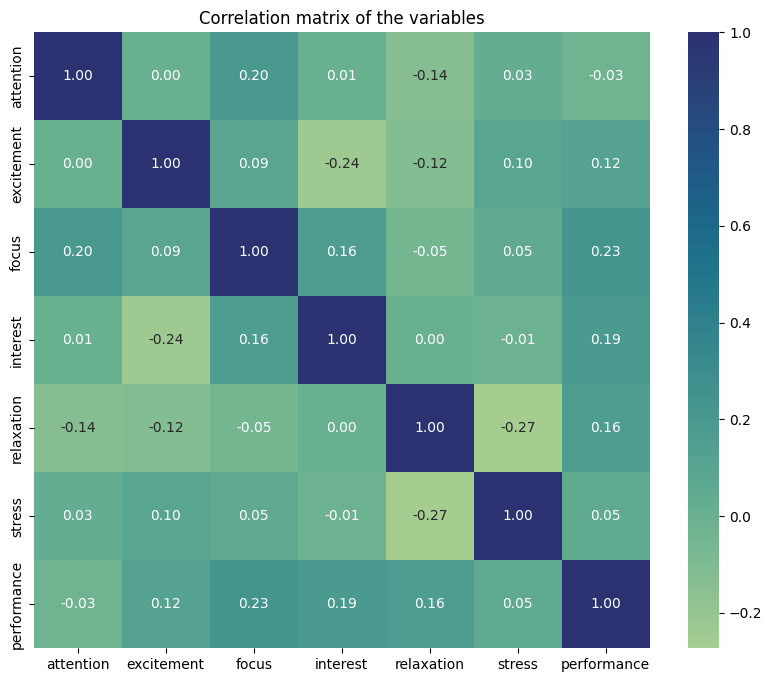

In [9]:
# Plot size
plt.figure(figsize=(10, 8))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True, square=True)

# Set the title of the plot
plt.title('Correlation matrix of the variables')

# Show the plot
plt.show()


# what is says? 🤔
The correlation coefficient ranges from -1 to 1. A value closer to 1 indicates a strong positive correlation, a value closer to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

Looking at the "performance" row/column, we can see how each variable correlates with performance:

- Attention: There's a very small negative correlation (-0.030) between attention and performance. This suggests that higher attention scores do not necessarily correspond to higher performance scores.

- Excitement: There's a small positive correlation (0.116) between excitement and performance. This suggests that higher excitement might correspond to slightly higher performance.

- Focus: There's a moderate positive correlation (0.226) between focus and performance. This suggests that higher focus scores might correspond to higher performance scores.

- Interest: There's a moderate positive correlation (0.193) between interest and performance. This suggests that higher interest scores might correspond to higher performance scores.

- Relaxation: There's a small positive correlation (0.162) between relaxation and performance. This suggests that higher relaxation scores might correspond to slightly higher performance scores.

- Stress: There's a very small positive correlation (0.054) between stress and performance. This suggests that higher stress scores do not necessarily correspond to higher performance scores.

Please note that these are correlation coefficients and do not indicate causation. They simply measure the linear relationship between two variables. Further, these results are based on randomly generated data, and may not reflect actual relationships in real data.

# Lets do some simple Machine learning ⛏

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature matrix X and target variable y
X = df.drop('performance', axis=1)
y = df['performance']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the performance on the test data
y_pred = model.predict(X_test)

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)


print(y_pred)
mse, model.coef_


[69.12384415 65.83333572 69.64297868 65.86411182 63.88555542 71.24155429
 61.15839812 70.70699089 63.32775858 68.17138206]


(88.17900934243788,
 array([-0.00124815,  0.16441316,  0.27167344,  0.19782944,  0.20604173,
         0.04422295]))

# Now what is this again? 🤔
- The Mean Squared Error (MSE) of the model on the test set is approximately 88.18. The MSE is a measure of the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

The coefficients of the model are as follows:

- Attention: -0.0012
- Excitement: 0.1644
- Focus: 0.2717
- Interest: 0.1978
- Relaxation: 0.2060
- Stress: 0.0442


These coefficients give us the change in the predicted performance for a one-unit increase in the corresponding variable, assuming all other variables are held constant. For example, an increase of one unit in the focus score is associated with an increase of 0.2717 units in the predicted performance score, assuming all other variables are held constant.

Please note that these results are based on a simple linear regression model, which assumes a linear relationship between the variables. In reality, the relationships could be more complex. Advanced machine learning models could potentially capture these complex relationships and provide more accurate predictions. However, these models often require larger datasets and more computational resources.

# Finally 📣
The results of this analysis can be used in a variety of ways for marketing, increasing awareness, and driving revenue for NEMA AI. Here are a few possibilities:

- Personalized Marketing: The analysis shows that different students have different learning styles and performance levels. NEMA AI can use this information to market their ability to provide personalized, AI-driven learning experiences. Highlighting the ability to cater to individual learning styles could be a unique selling proposition.

- Improving the Product: The insights derived from the analysis can be used to enhance the NEMA AI product. For example, the positive correlation between focus and performance could lead to the development of features that help students improve their focus. Similarly, understanding that students prefer interactive and video content could guide the development of new content.

- Targeted Interventions: The regression model can predict a student's performance based on their attention, excitement, focus, interest, relaxation, and stress levels. This could be used to identify students who are at risk of underperforming, allowing for targeted interventions. This could improve student outcomes, leading to higher customer satisfaction and positive word-of-mouth.

- Case Studies and Testimonials: The analysis could form the basis for case studies or testimonials demonstrating how NEMA AI's personalized approach leads to better learning outcomes. These could be used in marketing materials or shared on social media to increase awareness.

- Pricing Strategy: If NEMA AI's personalized approach leads to significantly better outcomes, this could potentially be used to justify a premium pricing strategy.

- Partnerships: The insights from the data could be used to form partnerships with educational institutions or other organizations. For example, NEMA AI could partner with schools to provide personalized learning experiences to their students.

- Investor Relations: This analysis and its implications could be used to attract investment by demonstrating that NEMA AI uses data-driven approaches to improve learning outcomes.

- note : Remember, these results are based on simulated data, might differ with real data.